<a href="https://colab.research.google.com/github/rafa-santana/Data-Science/blob/main/AN%C3%81LISE%20EXPLORAT%C3%93RIA%20DE%20DADOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ENGD02 - ESTATÍSTICA NA ENGENHARIA 

ANÁLISE EXPLORATÓRIA DE DADOS

DUPLA: PAULO SAMPAIO E RAFAEL SANTANA

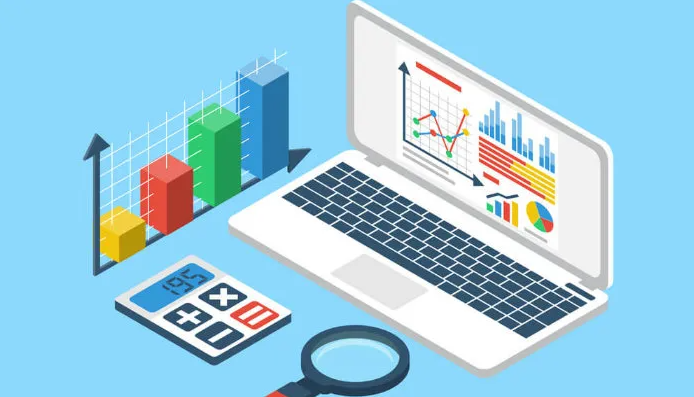


HIPÓTESE:
Uma indústria de grande porte encontra dificuldades para obtenção de matéria prima para sua produção. Devido a Pandemia de COVID19, os materiais ficaram mais escassos e mais caros. Neste cenário, com o objetivo de minimizar este impacto e manter um preço final competitivo no mercado, foi implementado um plano de redução de custos de produção. Neste plano consta a ampliação da rotina de Manutenção Preditiva, com isso, nosso setor de manutenção foi acionado para realizar um estudo inicial em dados de algumas máquinas, elaborando um relatório visando a implementação da Manutenção Preditiva nestas máquinas.




##ANÁLISE DOS DADOS COM EXCEL - FOCO NAS VARIÁVEIS DISCRETAS

Nesta parte do trabalho realizamos análises das variáveis discretas como idade das máquinas, modelo, erros e falhas. Foram realizados alguns gráficos e cálculos probabilísticos no Excel que geraram conclusões interessantes e úteis para a implementação do plano de manutenção Preditivo.

Link para acesso ao memorial de  cálculo no Excel: 

https://docs.google.com/spreadsheets/d/1gFtmdBSzzUVQNkV4RbCjXJn4viz7ZREY/edit?usp=sharing&ouid=109648772121603402181&rtpof=true&sd=true


ANÁLISE INICIAL DO BANDO DE DADOS

O nosso banco de dados possui 12 colunas e 1031 linhas,  com variáveis discretas (ID_maquina, tipo_erro, falha, modelo, idade_maquina, comp_subst)  e variáveis contínuas (volt, rotacao, pressao, vibracao). Existem alguns valores "NA" que a pricípio não serão excluídos e serão considerados como um registro de que a máquina se encontra em pleno funcionamento e sem erros, falhas ou componentes substituídos. Além disso, percebe-se que as falhas, erros e troca de componentes ocorrem simultaneamente em todas as máquinas independente da idade ou modelo.

###OBSERVAÇÃO 01 - IDADE E MODELO DAS MÁQUINAS

Como primeira observação deste dados, identificamos que eles são referentes a 11 máquinas de 03 modelos diferentes. Os dados foram coletados a cada uma hora no período de 24/02/2016 a 28/02/2016, totalizando 94 horas de registros por máquina. Através dos gráficos abaixos podemos verificar a idade de cada máquina, a média de idade e quais os seus modelos.

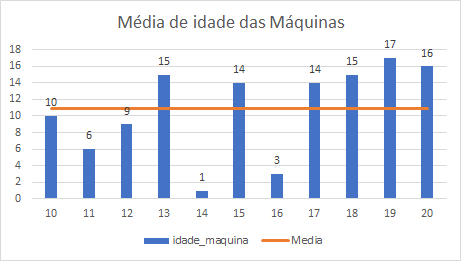

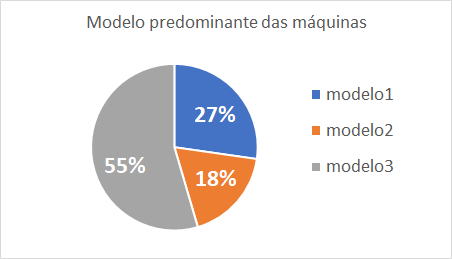

###CONCLUSÕES
Através destes gráficos de barras e de pizza acima, inferimos que as máquinas possuem idades distintas com uma média de idade de 10,9 anos. Quanto aos modelos percebemos que a maioria das máquinas são do modelo3, mais especificamente são 06 máquinas do modelo3, 03 máquinas do modelo1 e 02 máquinas do modelo2.


###OBSERVAÇÃO 02 - ANÁLISE DOS ERROS

Como a manutenção preditiva objetiva antecipar a necessidade dos serviços de manutenção, vamos focar neste primeiro momento na análise das ocorrências de erros nestes equipamentos, com o intuito de dar previsibilidade a estas ocorrências. Através das Distribuição de Bernoulli e da Distribuição Binomial extraímos algumas conclusões.

REGISTRO DA PROBABILIDADE DE ACONTECER UM ERRO QUALQUER

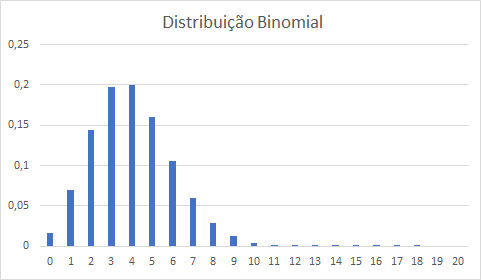

QUAL O ERRO MAIS FREQUENTE?

Ainda analisando as ocorrências dos erros, agora verificando a quantidade de ocorrências por tipo, obtemos o gráfico abaixo.
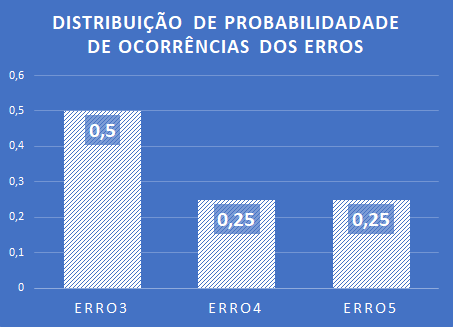

QUAL A FREQUÊNCIA QUE OS ERROS OCORREM?

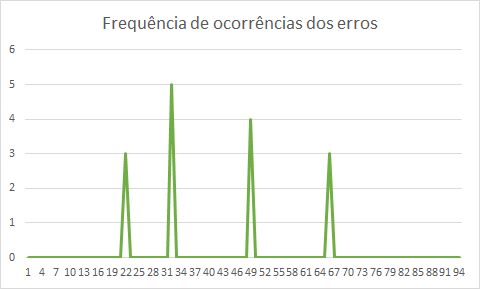

###CONCLUSÕES
Como foram registrados 44 erros em 1031 registros concluímos que a probabilidade de ocorrer um erro qualquer é de 4,27%. Através do gráfico de Distribuição Binomial concluímos que nas 94 horas de funcionamento a maior probabilidade é de que 04 erros aconteçam em cada uma das máquinas. Se preparando para este pior cenário, num mês serão aproximadamente 31 erros registrados por máquina, o que totaliza 341 ocorrências.

Através do gráfico de Barras percebemos que o erro do tipo "erro3" tem 50% de chance de ocorrer, enquanto que os erros do tipo "erro4" e "erro5" possuem 25%. Portanto Visto que a probabilidade de ocorrência do erro tipo 3 é maior, deve-se implementar um plano de ação mais rígido para este erro.

Analisando a frequência de ocorrência dos erros inferimos que o tempo médio para este evento ocorrer é de 15,5 horas.

###OBSERVAÇÃO 03 - ANÁLISE DAS FALHAS

Na manutenção preditiva a análise das falhas é de fundamental importância visto que a previsão destas ocorrência é um fator que caracteriza este tipo de manutenção. 

REGISTRO DA PROBABILIDADE DE OCORRER UMA FALHA

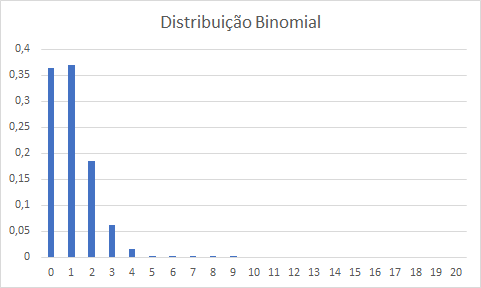

COM QUAL FREQUÊNCIA AS FALHAS OCORREM?

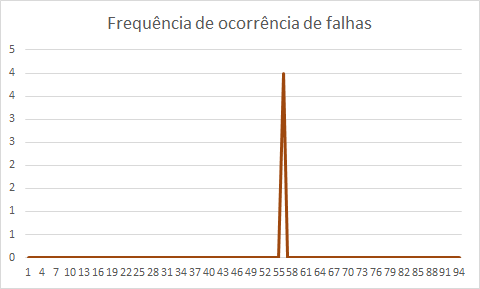

###CONCLUSÕES
Em todo o período de coleta de dados, identificamos uma ocorrência de falha no componente "comp4", com isso, concluímos que a probabilidade de ocorrer uma falha em uma máquina, no "comp4", é de 1,07%. Através do gráfico de Distribuição Binomial concluímos que nas 94 horas de funcionamento a maior probabilidade é de que 01 falha deste tipo aconteça em cada uma das máquinas. Se preparando para este pior cenário, num mês serão aproximadamente 8 falhas registrados por máquina, o que totaliza 88 ocorrências.

--------------------------------------------------------------------------
##ANÁLISE DOS DADOS COM PYTHON - FOCO NAS VARIÁVEIS CONTÍNUAS

Nesta parte do trabalho fizemos análise do nosso banco de dados e também plotamos alguns gráficos referentes as variáveis contínuas das máquinas como rotação, pressão e vibração. Estes resultados obtidos servirão para auxiliar na elaboração no plano de manutenção Preditiva proposto, pois podem permitir verificar se a causa raiz das falhas/erros está relacionada com a variabilidade da pressão, rotação, vibração ou voltagem.

In [ ]:
import pandas as pd #importando o biblioteca de dados
import matplotlib.pyplot as plt #importando o biblioteca de gráficos
import seaborn as sns #importando o biblioteca de gráficos
sns.set_theme() # Configurando tema padrão
Dados = pd.read_csv('/content/equipe_15.csv') #Abrir arquivo de dados
Dados.info() # Imprimindo informações sobre as variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1031 non-null   int64  
 1   Tempo          1031 non-null   object 
 2   ID_maquina     1031 non-null   int64  
 3   volt           524 non-null    float64
 4   rotacao        1031 non-null   float64
 5   pressao        1031 non-null   float64
 6   vibracao       986 non-null    float64
 7   tipo_erro      44 non-null     object 
 8   falha          11 non-null     object 
 9   modelo         1031 non-null   object 
 10  idade_maquina  1031 non-null   int64  
 11  comp_subst     22 non-null     object 
dtypes: float64(4), int64(3), object(5)
memory usage: 96.8+ KB


In [ ]:
#Analise das colunas relevantes
Dados.head(10)

,Unnamed: 0,Tempo,ID_maquina,volt,rotacao,pressao,vibracao,tipo_erro,falha,modelo,idade_maquina,comp_subst
0,1,2016-02-24 22:00:00,16,NaN,420.675344,103.053365,40.065167,NaN,NaN,model1,3,NaN
1,2,2016-02-24 22:00:00,17,NaN,468.253882,108.203196,29.481133,NaN,NaN,model1,14,NaN
2,3,2016-02-24 22:00:00,18,NaN,435.499999,104.513488,43.951567,NaN,NaN,model3,15,NaN
3,4,2016-02-24 22:00:00,19,173.145182,507.367353,86.889789,40.380684,NaN,NaN,model3,17,NaN
4,5,2016-02-24 22:00:00,20,NaN,450.072231,98.292309,34.607440,NaN,NaN,model2,16,NaN
5,6,2016-02-24 23:00:00,10,NaN,449.594321,102.500577,50.169125,NaN,NaN,model3,10,NaN
6,7,2016-02-24 23:00:00,11,NaN,441.002741,115.824276,36.708042,NaN,NaN,model2,6,NaN
7,8,2016-02-24 23:00:00,12,NaN,436.244415,99.008633,NaN,NaN,NaN,model3,9,NaN
8,9,2016-02-24 23:00:00,13,163.250205,328.145032,96.046096,47.979430,NaN,NaN,model1,15,NaN
9,10,2016-02-24 23:00:00,14,NaN,457.065785,97.601005,35.171396,NaN,NaN,model3,1,NaN


In [ ]:
#Analise e contagem dos erros e falhas
print('Quantidade de Falhas:')
display(Dados['falha'].value_counts())
print(' \r\nComponentes com Falhas:')
display(Dados['falha'].unique())
print(' \r\nQuantidade de Erros:')
display(Dados['tipo_erro'].value_counts())
print(' \r\nErros de Componentes:')
display(Dados['tipo_erro'].unique())

Quantidade de Falhas:


NameError: ignored

In [ ]:
#Analise das Falhas
Dados_Falha = Dados.loc[Dados['falha'] == 'comp4', :]
display(Dados_Falha.describe())
display(Dados_Falha)

,Unnamed: 0,ID_maquina,volt,rotacao,pressao,vibracao,idade_maquina
count,11.000000,11.000000,5.000000,11.000000,11.000000,11.000000,11.000000
mean,616.000000,15.000000,174.670438,450.280359,95.821004,40.096674,10.909091
std,3.316625,3.316625,12.346248,45.804615,6.930175,5.276667,5.521857
min,611.000000,10.000000,156.600047,352.017813,85.217095,33.625225,1.000000
25%,613.500000,12.500000,171.841275,427.269317,91.626309,36.828248,7.500000
50%,616.000000,15.000000,172.575338,457.587938,95.523567,38.455660,14.000000
75%,618.500000,17.500000,184.377566,472.028312,99.874663,42.156252,15.000000
max,621.000000,20.000000,187.957966,527.456242,110.933546,49.678722,17.000000


,Unnamed: 0,Tempo,ID_maquina,volt,rotacao,pressao,vibracao,tipo_erro,falha,modelo,idade_maquina,comp_subst
610,611,2016-02-27 06:00:00,10,187.957966,446.922209,89.339302,38.309434,NaN,comp4,model3,10,comp4
611,612,2016-02-27 06:00:00,11,172.575338,457.587938,93.644530,34.442709,NaN,comp4,model2,6,comp4
612,613,2016-02-27 06:00:00,12,NaN,432.098025,110.933546,40.201523,NaN,comp4,model3,9,comp4
613,614,2016-02-27 06:00:00,13,NaN,473.034054,89.608088,44.110981,NaN,comp4,model1,15,comp4
614,615,2016-02-27 06:00:00,14,NaN,527.456242,95.523567,36.849806,NaN,comp4,model3,1,comp4
615,616,2016-02-27 06:00:00,15,156.600047,492.221769,85.217095,36.806690,NaN,comp4,model3,14,comp4
616,617,2016-02-27 06:00:00,16,171.841275,464.075766,99.789225,40.156099,NaN,comp4,model1,3,comp4
617,618,2016-02-27 06:00:00,17,NaN,414.206947,99.960101,33.625225,NaN,comp4,model1,14,comp4
618,619,2016-02-27 06:00:00,18,184.377566,352.017813,94.054344,38.455660,NaN,comp4,model3,15,comp4
619,620,2016-02-27 06:00:00,19,NaN,422.440610,100.063316,48.426561,NaN,comp4,model3,17,comp4


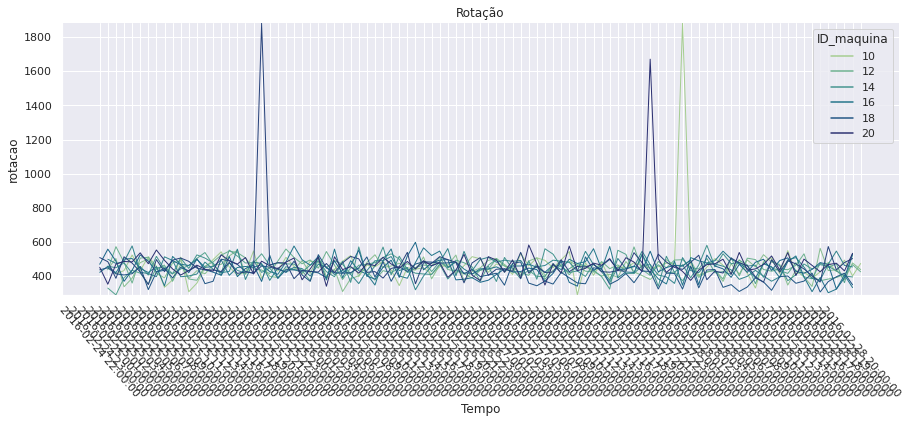

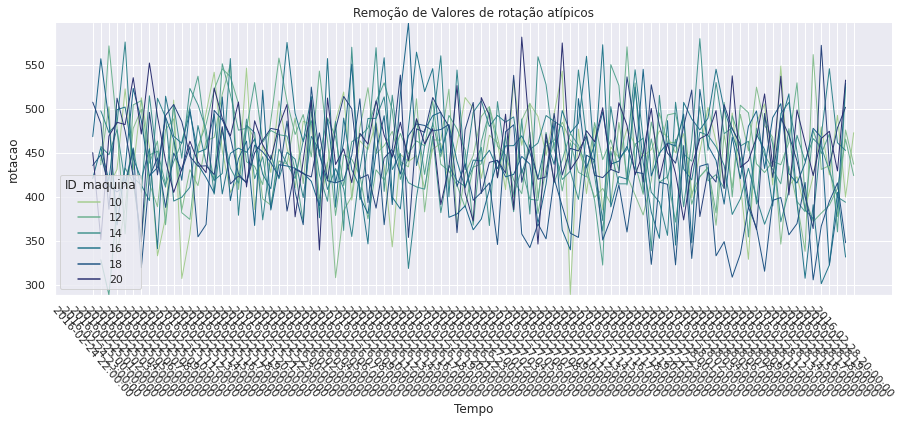

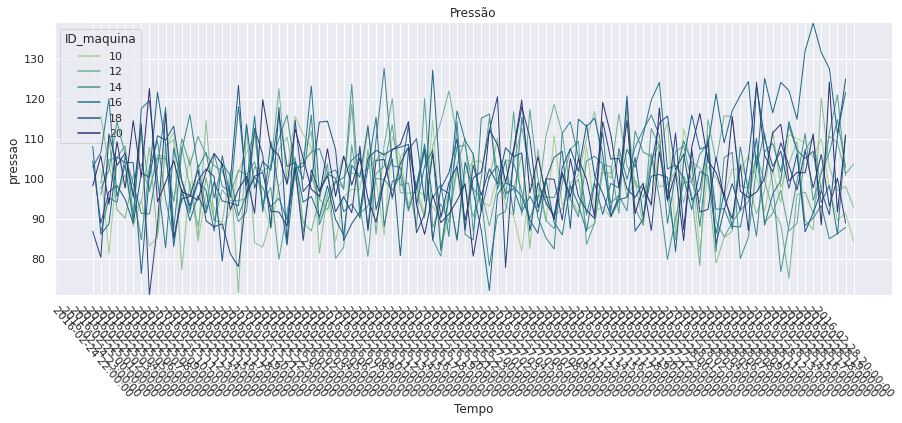

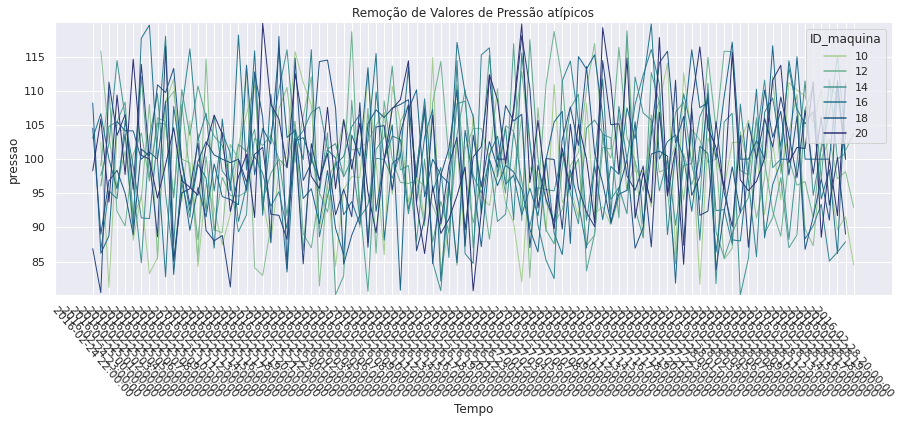

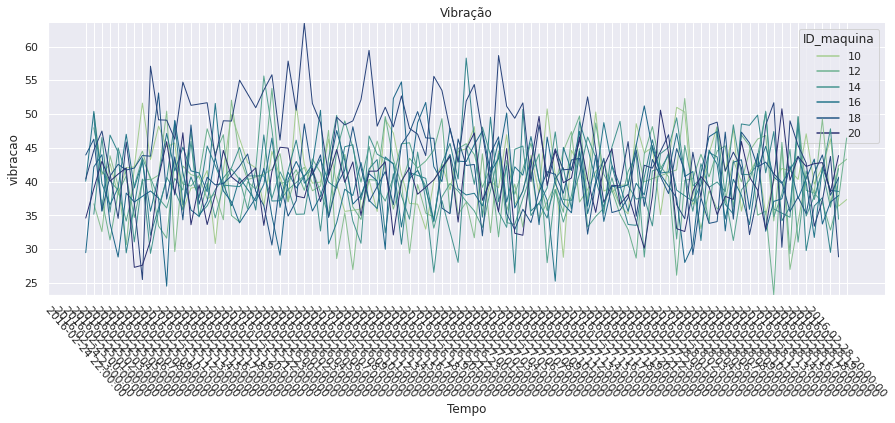

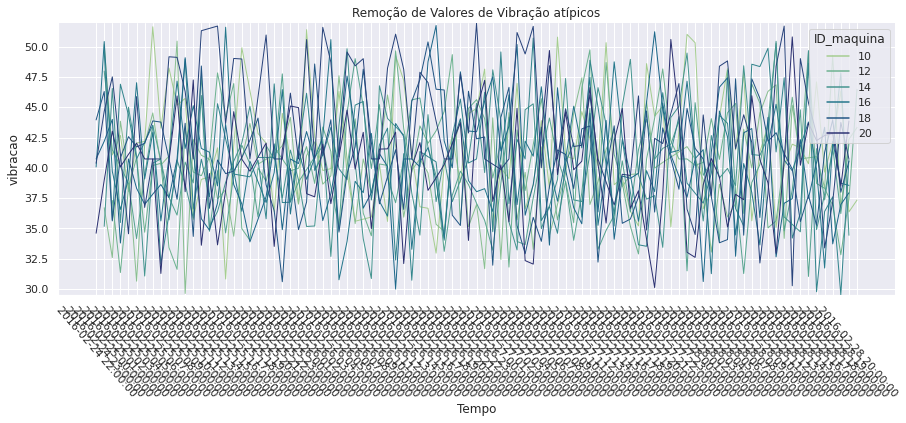

In [ ]:
# Representação dos dados da rotação
Dados_ret = Dados.copy()

fig, axes = plt.subplots(1, 1, figsize=(15,5), sharex=True)

sns.lineplot(x=Dados['Tempo'],
             y=Dados['rotacao'],
             hue=Dados['ID_maquina'],
             lw=1,
             data=Dados,
             palette=sns.color_palette("crest", as_cmap=True),
             zorder=10)
plt.xticks(rotation=Dados['Tempo'].count()) # Ajuste dos valores do eixo x
plt.ylim([Dados['rotacao'].min(), Dados['rotacao'].max()]) # Ajuste do intervalo do eixo y
plt.title('Rotação')
sns.despine()
plt.show()

# Representação dos dados da rotação

rmedio = Dados_ret['rotacao'].mean()

rmaximo = rmedio + 2* Dados_ret['rotacao'].std()
rminimo = rmedio - 2* Dados_ret['rotacao'].std()

Dados_ret['rotacao'].values[Dados_ret['rotacao'].values > rmaximo] = rmedio
Dados_ret['rotacao'].values[Dados_ret['rotacao'].values < rminimo] = rmedio

fig, axes = plt.subplots(1, 1, figsize=(15,5), sharex=True)

sns.lineplot(x=Dados_ret['Tempo'],
             y=Dados_ret['rotacao'],
             hue=Dados_ret['ID_maquina'],
             lw=1,
             data=Dados_ret,
             palette=sns.color_palette("crest", as_cmap=True),
             zorder=5)


plt.xticks(rotation=Dados_ret['Tempo'].count()) # Ajuste dos valores do eixo x
plt.ylim([Dados_ret['rotacao'].min(), Dados_ret['rotacao'].max()]) # Ajuste do intervalo do eixo y
plt.title('Remoção de Valores de rotação atípicos')
sns.despine()
plt.show()

# Representação dos dados da pressão
fig, axes = plt.subplots(1, 1, figsize=(15,5), sharex=True)

sns.lineplot(x=Dados['Tempo'],
             y=Dados['pressao'],
             hue=Dados['ID_maquina'],
             lw=1,
             data=Dados,
             palette=sns.color_palette("crest", as_cmap=True),
             zorder=10)
plt.xticks(rotation=Dados['Tempo'].count()) # Ajuste dos valores do eixo x
plt.ylim([Dados['pressao'].min(), Dados['pressao'].max()]) # Ajuste do intervalo do eixo y
plt.title('Pressão')
sns.despine()
plt.show()

# Representação dos dados da Vibração
pmedio = Dados_ret['pressao'].mean()

pmaximo = pmedio + 2* Dados_ret['pressao'].std()
pminimo = pmedio - 2* Dados_ret['pressao'].std()

Dados_ret['pressao'].values[Dados_ret['pressao'].values > pmaximo] = pmedio
Dados_ret['pressao'].values[Dados_ret['pressao'].values < pminimo] = pmedio

fig, axes = plt.subplots(1, 1, figsize=(15,5), sharex=True)

sns.lineplot(x=Dados_ret['Tempo'],
             y=Dados_ret['pressao'],
             hue=Dados_ret['ID_maquina'],
             lw=1,
             data=Dados_ret,
             palette=sns.color_palette("crest", as_cmap=True),
             zorder=5)


plt.xticks(rotation=Dados_ret['Tempo'].count()) # Ajuste dos valores do eixo x
plt.ylim([Dados_ret['pressao'].min(), Dados_ret['pressao'].max()]) # Ajuste do intervalo do eixo y
plt.title('Remoção de Valores de Pressão atípicos')
sns.despine()
plt.show()

# Representação dos dados da vibração
fig, axes = plt.subplots(1, 1, figsize=(15,5), sharex=True)

sns.lineplot(x=Dados['Tempo'],
             y=Dados['vibracao'],
             hue=Dados['ID_maquina'],
             lw=1,
             data=Dados,
             palette=sns.color_palette("crest", as_cmap=True),
             zorder=10)
plt.xticks(rotation=Dados['Tempo'].count()) # Ajuste dos valores do eixo x
plt.ylim([Dados['vibracao'].min(), Dados['vibracao'].max()]) # Ajuste do intervalo do eixo y
plt.title('Vibração')
sns.despine()
plt.show()



# Representação dos dados da vibração
vmedio = Dados_ret['vibracao'].mean()

vmaximo = vmedio + 2* Dados_ret['vibracao'].std()
vminimo = vmedio - 2* Dados_ret['vibracao'].std()

Dados_ret['vibracao'].values[Dados_ret['vibracao'].values > vmaximo] = vmedio
Dados_ret['vibracao'].values[Dados_ret['vibracao'].values < vminimo] = vmedio

fig, axes = plt.subplots(1, 1, figsize=(15,5), sharex=True)

sns.lineplot(x=Dados_ret['Tempo'],
             y=Dados_ret['vibracao'],
             hue=Dados_ret['ID_maquina'],
             lw=1,
             data=Dados_ret,
             palette=sns.color_palette("crest", as_cmap=True),
             zorder=5)


plt.xticks(rotation=Dados_ret['Tempo'].count()) # Ajuste dos valores do eixo x
plt.ylim([Dados_ret['vibracao'].min(), Dados_ret['vibracao'].max()]) # Ajuste do intervalo do eixo y
plt.title('Remoção de Valores de Vibração atípicos')
sns.despine()
plt.show()

Hora do erro(s):


,Tempo
0,2016-02-27 06:00:00


2016-02-27 06:00:00
2016-02-25 06:00:00


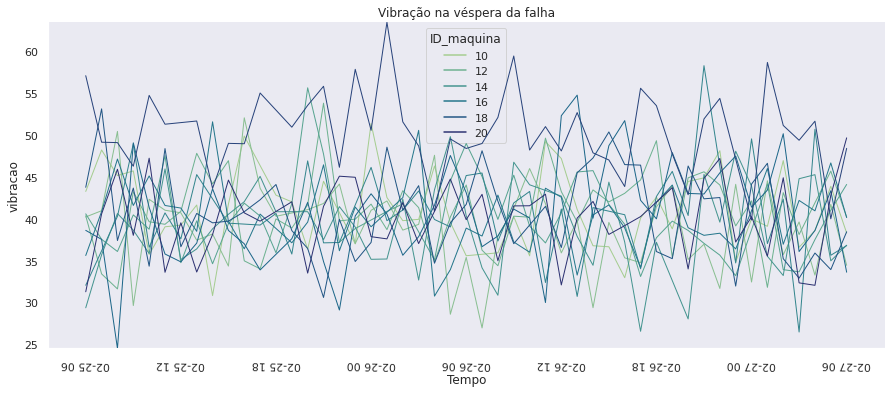

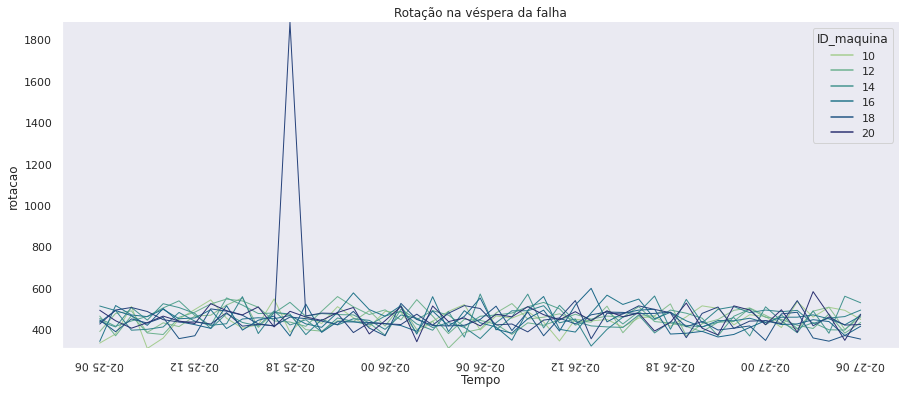

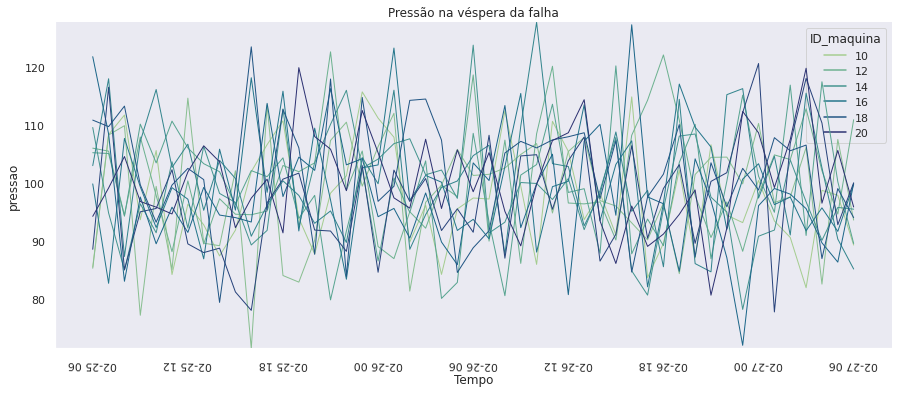

In [ ]:
#analise dos dados antes das falhas
dbe = Dados.copy()
dbe['Tempo'] = pd.to_datetime(dbe['Tempo'])
horaerro = dbe.loc[Dados['falha'].notnull(), :]
horaerro2 = horaerro['Tempo'].unique()
horaerro2 = pd.DataFrame(horaerro2, columns=['Tempo'])
pd.Index(horaerro2)
print('Hora do erro(s):')
display(horaerro2)

for index, row in horaerro2.iterrows():
  dataalvo = row['Tempo']
  print(dataalvo)
  database = dataalvo  - pd.DateOffset(days=2)
  print(database)
  dataantes = dbe["Tempo"] >= database
  datafinal = dbe["Tempo"] <= dataalvo
  filtrodata = dataantes & datafinal
  dbe = dbe.loc[filtrodata]
  fig, axes = plt.subplots(1, 1, figsize=(15,6), sharex=True)
  sns.lineplot(x=dbe['Tempo'], y=dbe['vibracao'], hue=dbe['ID_maquina'], lw=1, data=dbe, palette=sns.color_palette("crest", as_cmap=True), zorder=10)
  plt.xticks(rotation=dbe['Tempo'].count()) # Ajuste dos valores do eixo x
  plt.ylim([dbe['vibracao'].min(), dbe['vibracao'].max()]) # Ajuste do intervalo do eixo y
  plt.title('Vibração na véspera da falha')
  sns.despine()
  plt.show()
  fig, axes = plt.subplots(1, 1, figsize=(15,6), sharex=True)
  sns.lineplot(x=dbe['Tempo'], y=dbe['rotacao'], hue=dbe['ID_maquina'], lw=1, data=dbe, palette=sns.color_palette("crest", as_cmap=True), zorder=10)
  plt.xticks(rotation=dbe['Tempo'].count()) # Ajuste dos valores do eixo x
  plt.ylim([dbe['rotacao'].min(), dbe['rotacao'].max()]) # Ajuste do intervalo do eixo y
  plt.title('Rotação na véspera da falha')
  sns.despine()
  plt.show()
  fig, axes = plt.subplots(1, 1, figsize=(15,6), sharex=True)
  sns.lineplot(x=dbe['Tempo'], y=dbe['pressao'], hue=dbe['ID_maquina'], lw=1, data=dbe, palette=sns.color_palette("crest", as_cmap=True), zorder=10)
  plt.xticks(rotation=dbe['Tempo'].count()) # Ajuste dos valores do eixo x
  plt.ylim([dbe['pressao'].min(), dbe['pressao'].max()]) # Ajuste do intervalo do eixo y
  plt.title('Pressão na véspera da falha')
  sns.despine()
  plt.show()

Hora do erro(s):


,Tempo
0,2016-02-27 06:00:00


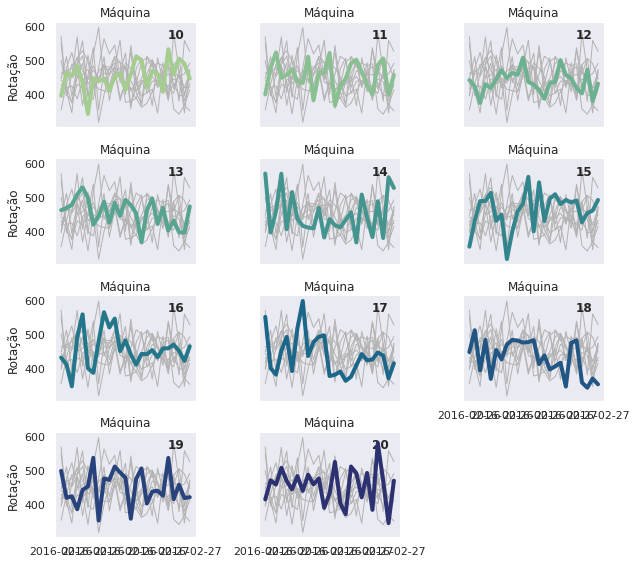

In [ ]:
#analise da rotação antes das falhas
dbe = Dados.copy()
dbe['Tempo'] = pd.to_datetime(dbe['Tempo'])
horaerro = dbe.loc[Dados['falha'].notnull(), :]
horaerro2 = horaerro['Tempo'].unique()
horaerro2 = pd.DataFrame(horaerro2, columns=['Tempo'])
pd.Index(horaerro2)
print('Hora do erro(s):')
display(horaerro2)

for index, row in horaerro2.iterrows():
  dataalvo = row['Tempo']
  database = dataalvo  - pd.DateOffset(days=1)
  dataantes = dbe["Tempo"] >= database
  datafinal = dbe["Tempo"] <= dataalvo
  filtrodata = dataantes & datafinal
  dbe = dbe.loc[filtrodata]
  sns.set_theme(style="dark")
  g = sns.relplot(
    data=dbe,
    x="Tempo", y="rotacao", col="ID_maquina", hue="ID_maquina",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)
  # Iterate over each subplot to customize further
  for ID_maquina, ax in g.axes_dict.items():
     ax.text(.8, .85, ID_maquina, transform=ax.transAxes, fontweight="bold")
     sns.lineplot(data=dbe, x="Tempo", y="rotacao", units="ID_maquina",estimator=None, color=".7", linewidth=1, ax=ax)

ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("Máquina")
g.set_axis_labels("", "Rotação")
g.tight_layout()


Hora do erro(s):


,Tempo
0,2016-02-27 06:00:00


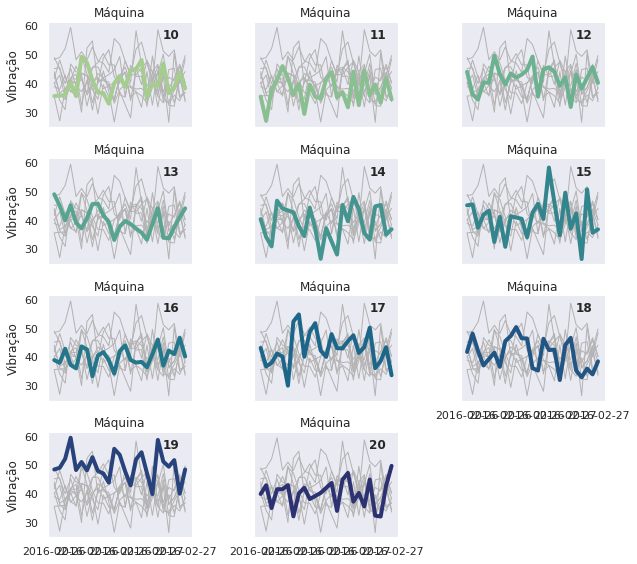

In [ ]:
#analise da vibração antes das falhas
dbe = Dados.copy()
dbe['Tempo'] = pd.to_datetime(dbe['Tempo'])
horaerro = dbe.loc[Dados['falha'].notnull(), :]
horaerro2 = horaerro['Tempo'].unique()
horaerro2 = pd.DataFrame(horaerro2, columns=['Tempo'])
pd.Index(horaerro2)
print('Hora do erro(s):')
display(horaerro2)

for index, row in horaerro2.iterrows():
  dataalvo = row['Tempo']
  database = dataalvo  - pd.DateOffset(days=1)
  dataantes = dbe["Tempo"] >= database
  datafinal = dbe["Tempo"] <= dataalvo
  filtrodata = dataantes & datafinal
  dbe = dbe.loc[filtrodata]
  sns.set_theme(style="dark")
  g = sns.relplot(
    data=dbe,
    x="Tempo", y="vibracao", col="ID_maquina", hue="ID_maquina",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)
  # Iterate over each subplot to customize further
  for ID_maquina, ax in g.axes_dict.items():
     ax.text(.8, .85, ID_maquina, transform=ax.transAxes, fontweight="bold")
     sns.lineplot(data=dbe, x="Tempo", y="vibracao", units="ID_maquina",estimator=None, color=".7", linewidth=1, ax=ax)

ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("Máquina")
g.set_axis_labels("", "Vibração")
g.tight_layout()


Hora do erro(s):


,Tempo
0,2016-02-27 06:00:00


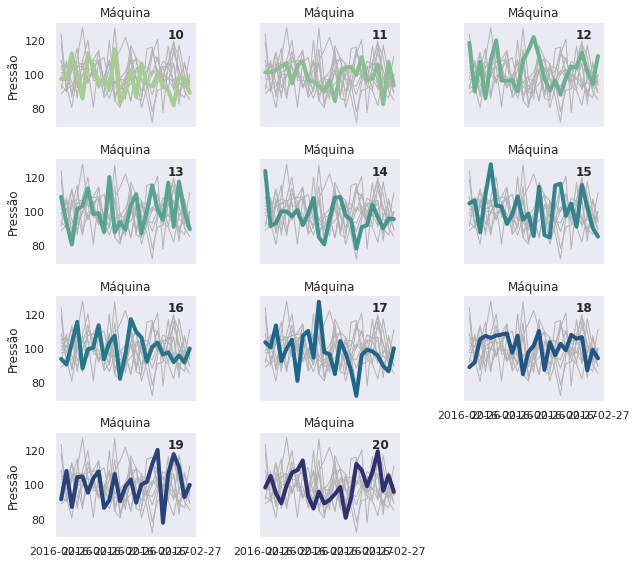

In [ ]:
#analise da pressão antes das falhas
dbe = Dados.copy()
dbe['Tempo'] = pd.to_datetime(dbe['Tempo'])
horaerro = dbe.loc[Dados['falha'].notnull(), :]
horaerro2 = horaerro['Tempo'].unique()
horaerro2 = pd.DataFrame(horaerro2, columns=['Tempo'])
pd.Index(horaerro2)
print('Hora do erro(s):')
display(horaerro2)

for index, row in horaerro2.iterrows():
  dataalvo = row['Tempo']
  database = dataalvo  - pd.DateOffset(days=1)
  dataantes = dbe["Tempo"] >= database
  datafinal = dbe["Tempo"] <= dataalvo
  filtrodata = dataantes & datafinal
  dbe = dbe.loc[filtrodata]
  sns.set_theme(style="dark")
  g = sns.relplot(
    data=dbe,
    x="Tempo", y="pressao", col="ID_maquina", hue="ID_maquina",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)
  # Iterate over each subplot to customize further
  for ID_maquina, ax in g.axes_dict.items():
     ax.text(.8, .85, ID_maquina, transform=ax.transAxes, fontweight="bold")
     sns.lineplot(data=dbe, x="Tempo", y="pressao", units="ID_maquina",estimator=None, color=".7", linewidth=1, ax=ax)

ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("Máquina")
g.set_axis_labels("", "Pressão")
g.tight_layout()


Hora do erro(s):


,Tempo
0,2016-02-27 06:00:00


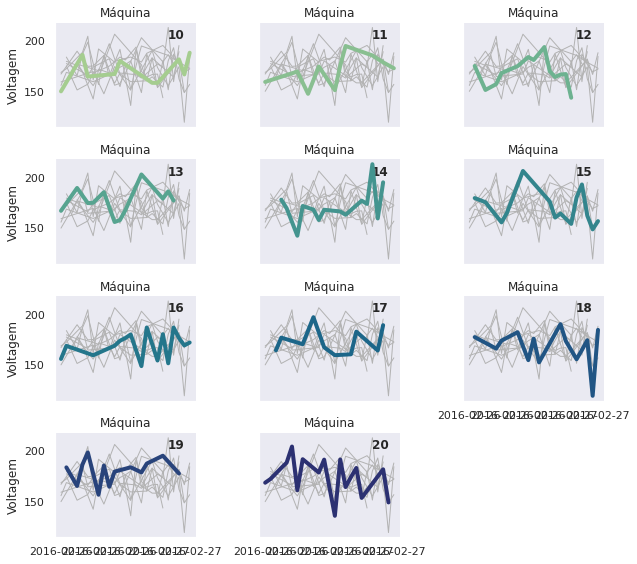

In [ ]:
#analise da voltagem antes das falhas
dbe = Dados.copy()
dbe['Tempo'] = pd.to_datetime(dbe['Tempo'])
horaerro = dbe.loc[Dados['falha'].notnull(), :]
horaerro2 = horaerro['Tempo'].unique()
horaerro2 = pd.DataFrame(horaerro2, columns=['Tempo'])
pd.Index(horaerro2)
print('Hora do erro(s):')
display(horaerro2)

for index, row in horaerro2.iterrows():
  dataalvo = row['Tempo']
  database = dataalvo  - pd.DateOffset(days=1)
  dataantes = dbe["Tempo"] >= database
  datafinal = dbe["Tempo"] <= dataalvo
  filtrodata = dataantes & datafinal
  dbe = dbe.loc[filtrodata]
  sns.set_theme(style="dark")
  g = sns.relplot(
    data=dbe,
    x="Tempo", y="volt", col="ID_maquina", hue="ID_maquina",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)
  # Iterate over each subplot to customize further
  for ID_maquina, ax in g.axes_dict.items():
     ax.text(.8, .85, ID_maquina, transform=ax.transAxes, fontweight="bold")
     sns.lineplot(data=dbe, x="Tempo", y="volt", units="ID_maquina",estimator=None, color=".7", linewidth=1, ax=ax)

ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("Máquina")
g.set_axis_labels("", "Voltagem")
g.tight_layout()


Hora do erro(s):


,Tempo
0,2016-02-27 06:00:00


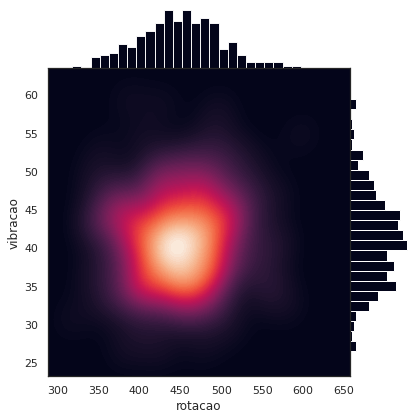

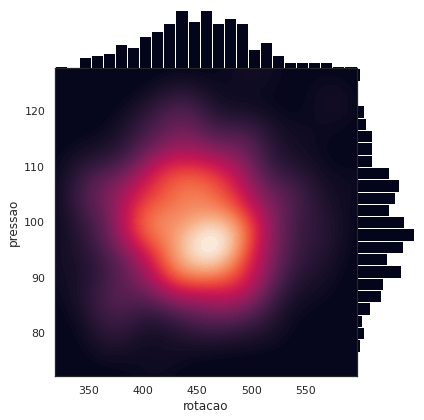

In [ ]:
dbe = Dados.copy()
dbe['Tempo'] = pd.to_datetime(dbe['Tempo'])
horaerro = dbe.loc[Dados['falha'].notnull(), :]
horaerro2 = horaerro['Tempo'].unique()
horaerro2 = pd.DataFrame(horaerro2, columns=['Tempo'])
pd.Index(horaerro2)
print('Hora do erro(s):')
display(horaerro2)

for index, row in horaerro2.iterrows():
  dataalvo = row['Tempo']
  database = dataalvo  - pd.DateOffset(days=1)
  dataantes = dbe["Tempo"] >= database
  datafinal = dbe["Tempo"] <= dataalvo
  xmax = dbe['rotacao'].max()
  xmin = dbe['rotacao'].min()
  ymax = dbe['vibracao'].max()
  ymin = dbe['vibracao'].min()
  filtrodata = dataantes & datafinal
  dbe = dbe.loc[filtrodata]
  sns.set_theme(style="white")
  g = sns.JointGrid(data=dbe, x="rotacao", y="vibracao", space=0)
  g.plot_joint(sns.kdeplot,
             fill=True, clip=((xmin, xmax), (ymin, ymax)),
             thresh=0, levels=100, cmap="rocket")
  g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)
  

for index, row in horaerro2.iterrows():
  dataalvo = row['Tempo']
  database = dataalvo  - pd.DateOffset(days=1)
  dataantes = dbe["Tempo"] >= database
  datafinal = dbe["Tempo"] <= dataalvo
  xmax = dbe['rotacao'].max()
  xmin = dbe['rotacao'].min()
  ymax = dbe['pressao'].max()
  ymin = dbe['pressao'].min()
  filtrodata = dataantes & datafinal
  dbe = dbe.loc[filtrodata]
  sns.set_theme(style="white")
  g = sns.JointGrid(data=dbe, x="rotacao", y="pressao", space=0)
  g.plot_joint(sns.kdeplot,
             fill=True, clip=((xmin, xmax), (ymin, ymax)),
             thresh=0, levels=100, cmap="rocket")
  g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)
